In [3]:
#Importing required libraries.

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,Convolution2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# **Importing dataset from google drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Connecting Data from Google Drive**

In [5]:
data_location = '/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train/covid'
CLASS_NAMES = ['covid-19', 'healthy'] 
IMAGE_SHAPE = (256, 256, 3)
BATCH_SIZE = 10
EPOCHS = 50
DATASET_SIZE = sum([len(files) for r, d, files in os.walk(data_location)])

In [6]:
DATASET_SIZE  

242

#We had very few covid-positive datas. So we did data augmentation to create new covid-positive datas by changong some attributes from existing datas

In [ ]:
import keras
import cv2
import os
import glob
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rotation_range =5,    
                         rescale=1./255, 
                         shear_range=0.2, 
                         zoom_range=0.3, 
                         horizontal_flip = True, 
                         fill_mode = 'nearest', 
                         data_format='channels_last', 
                         brightness_range=[0.2,1.0])


img_dir = "/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train/covid" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
path, dirs, files = next(os.walk("/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train/covid"))
file_count = len(files) #to find number of files in folder

for batch in datagen.flow (x, batch_size=1, save_to_dir =r'/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train/covid',save_prefix="a",save_format='jpg'):
    i+=1
    if i==file_count:
      break

# **For deleting extra folder of Augmented images**

In [ ]:
# import os

# filelist = [ f for f in os.listdir("/content/drive/MyDrive/DeepLearningPorject/data_set/train/new") if f.endswith(".jpg") ]
# for f in filelist:
#     os.remove(os.path.join("/content/drive/MyDrive/DeepLearningPorject/data_set/train/new", f))

In [10]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=40,
        brightness_range=[0.2,1.0],
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode = 'nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 1236 images belonging to 2 classes.
Found 1573 images belonging to 2 classes.


# **Initializing the Model**

In [7]:
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines


#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Dropout(0.25))

#second convolution and pooling steps.
classifier.add( Convolution2D(32,3,3,input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Dropout(0.25))


#step -3 Flattening
classifier.add(Flatten())

#step-4 Full connection step
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
#binary outcome

# **Compiling the Moedel**

In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

# **Training Model**

In [11]:
steps_per_epoch = len(training_set)//BATCH_SIZE
validation_steps = len(test_set)//BATCH_SIZE # if you have test data


results = classifier.fit(training_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    workers=1)
print(len(training_set))
print(len(test_set))

Epoch 1/100
3/3 [==============================] - 107s 45s/step - loss: 0.6771 - accuracy: 0.6992 - val_loss: 0.5347 - val_accuracy: 0.9312
Epoch 2/100
3/3 [==============================] - 91s 41s/step - loss: 0.6137 - accuracy: 0.8177 - val_loss: 0.4078 - val_accuracy: 0.9312
Epoch 3/100
3/3 [==============================] - 80s 36s/step - loss: 0.6114 - accuracy: 0.7148 - val_loss: 0.3477 - val_accuracy: 0.9062
Epoch 4/100
3/3 [==============================] - 77s 34s/step - loss: 0.5304 - accuracy: 0.8021 - val_loss: 0.2239 - val_accuracy: 0.9438
Epoch 5/100
3/3 [==============================] - 57s 25s/step - loss: 0.4987 - accuracy: 0.8398 - val_loss: 0.3234 - val_accuracy: 0.9000
Epoch 6/100
3/3 [==============================] - 62s 26s/step - loss: 0.7045 - accuracy: 0.6940 - val_loss: 0.2352 - val_accuracy: 0.9438
Epoch 7/100
3/3 [==============================] - 50s 22s/step - loss: 0.5431 - accuracy: 0.8060 - val_loss: 0.2269 - val_accuracy: 0.9563
Epoch 8/100
3/3 [==

# **Model summary**

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

# **Training VS Validation**

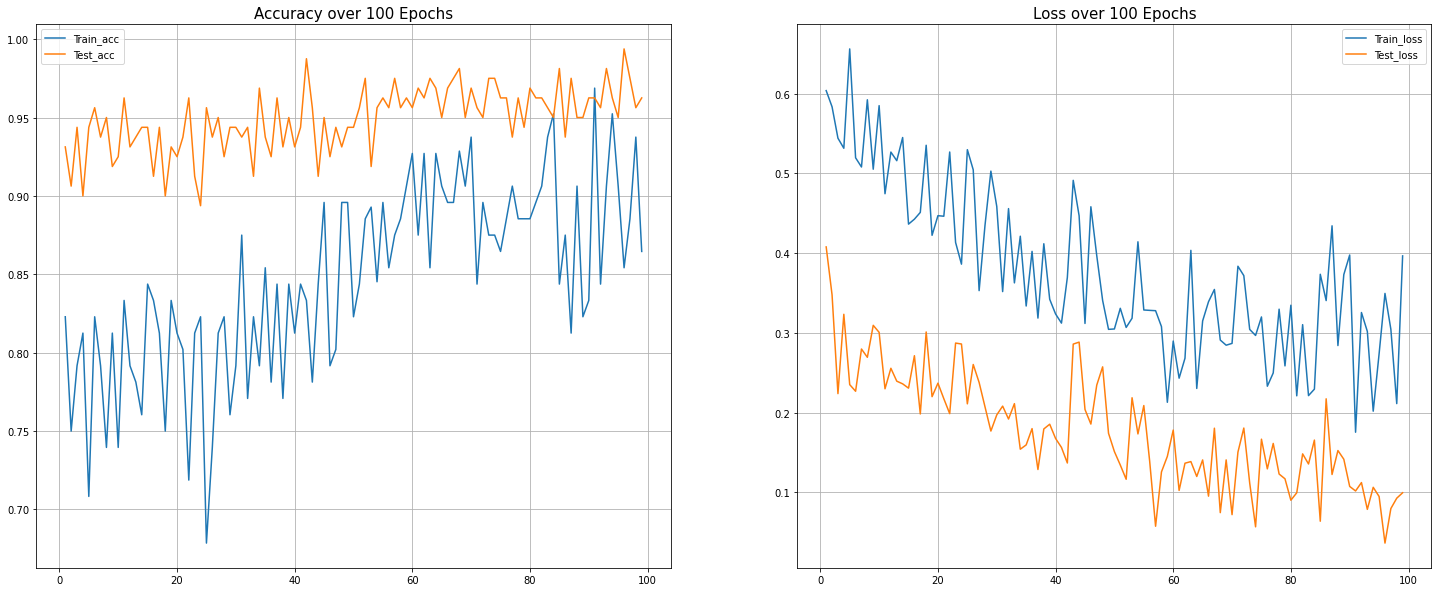

In [13]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(25, 10))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 100)

# **Predictions**


In [21]:
import numpy as np
from keras.preprocessing import image

print(training_set.class_indices)

{'covid': 0, 'non': 1}


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


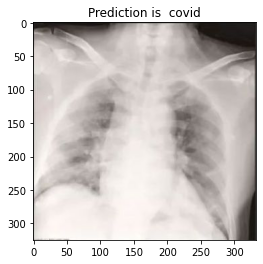

In [20]:

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Test Image path
imagePath = "/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/test/covid/yxppt-2020-02-19_00-51-27_287214-day10.jpg"

img=mpimg.imread(imagePath)
imgplot = plt.imshow(img)

test_image = image.load_img(imagePath, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'

    
plt=plt.title('Prediction is  '+ prediction )

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


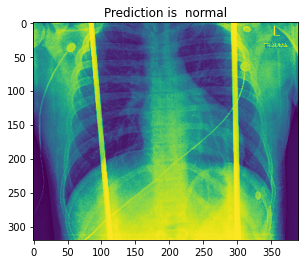

In [22]:

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imagePath = "/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/test/non/patient00599-study1-view1_frontal.jpg"

img=mpimg.imread(imagePath)
imgplot = plt.imshow(img)

test_image = image.load_img(imagePath, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'

    

plt=plt.title('Prediction is  '+ prediction )

In [16]:
loss, accuracy = classifier.evaluate(test_set, steps = validation_steps)

print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("---------------------------")

5/5 [==============================] - 1s 157ms/step - loss: 0.2074 - accuracy: 0.9375
Loss: 0.21
Accuracy: 0.94
---------------------------
